<div style="font-family: 'thistle'; font-size: 25px; color: #ffffff; background-color: #9370DB; padding: 10px; text-align: center;">
   * Amazon Sales Report *
</div>

<div style="font-family: 'CASTELLAR'; font-size: 20px; color: #9370DB; text-align: rightside;">
   Table of Contents
</div>

<ul>
   <li><a href="#Exploratory Data Analysis">Data Overview: Data Cleaning, Data Analysis, and Visualization.</a></li>
  <li><a href="#sales-overview">Sales Overview: Performance, trends, and patterns.</a></li>
  <li><a href="#product-analysis">Product Analysis: Popular products and sales distribution.</a></li>
  <li><a href="#fulfillment-analysis">Fulfillment Analysis: Methods and delivery effectiveness.</a></li>
  <li><a href="#customer-segmentation">Customer Segmentation: Demographics and preferences.</a></li>
  <li><a href="#geographical-analysis">Geographical Analysis: Sales distribution across regions.</a></li>
  <li><a href="#business-insights">Business Insights and Recommendations: Key findings and recommendations.</a></li>
  <li><a href="#conclusion">Conclusion</a></li>
</ul>


# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df=pd.read_csv("Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


# Explore Data

In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              128976 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,128976.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,609.339491,463945.677744,NaN,NaN
std,37232.897832,0.313368,313.342529,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,413.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,583.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,771.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [7]:
df.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                     0
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

# Data cleaning

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128976 non-null  int64         
 1   Order ID            128976 non-null  object        
 2   Date                128976 non-null  datetime64[ns]
 3   Status              128976 non-null  object        
 4   Fulfilment          128976 non-null  object        
 5   Sales Channel       128976 non-null  object        
 6   ship-service-level  128976 non-null  object        
 7   Category            128976 non-null  object        
 8   Size                128976 non-null  object        
 9   Courier Status      128976 non-null  object        
 10  Qty                 128976 non-null  int64         
 11  currency            121176 non-null  object        
 12  Amount              128976 non-null  float64       
 13  ship-city           128941 no

In [10]:
# Fill missing 'currency' values with the most frequent currency
most_frequent_currency = df['currency'].mode()[0]
df['currency'].fillna(most_frequent_currency, inplace=True)



In [11]:
# Drop rows where any of the shipping address components are missing
df.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)



In [12]:
# Add the 'Unknown' category to 'fulfilled-by' and then fill missing values
if 'fulfilled-by' in df.columns:
    df['fulfilled-by'] = df['fulfilled-by'].astype('category')
    df['fulfilled-by'] = df['fulfilled-by'].cat.add_categories('Unknown')
    df['fulfilled-by'].fillna('Unknown', inplace=True)



In [13]:
# Drop entirely null columns 'New' and 'PendingS'
df.drop(columns=['New', 'PendingS'], inplace=True)

In [14]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [15]:
df['ship-city'] = df['ship-city'].str.upper()
df['ship-state'] = df['ship-state'].str.upper()
print(df[['ship-city', 'ship-state']])

          ship-city    ship-state
0            MUMBAI   MAHARASHTRA
1         BENGALURU     KARNATAKA
2       NAVI MUMBAI   MAHARASHTRA
3        PUDUCHERRY    PUDUCHERRY
4           CHENNAI    TAMIL NADU
...             ...           ...
128971    HYDERABAD     TELANGANA
128972     GURUGRAM       HARYANA
128973    HYDERABAD     TELANGANA
128974        HALOL       GUJARAT
128975       RAIPUR  CHHATTISGARH

[128941 rows x 2 columns]


In [16]:
print(df[['ship-city', 'ship-state']].head())

     ship-city   ship-state
0       MUMBAI  MAHARASHTRA
1    BENGALURU    KARNATAKA
2  NAVI MUMBAI  MAHARASHTRA
3   PUDUCHERRY   PUDUCHERRY
4      CHENNAI   TAMIL NADU


In [17]:
print(df[['ship-city', 'ship-state']].tail())

        ship-city    ship-state
128971  HYDERABAD     TELANGANA
128972   GURUGRAM       HARYANA
128973  HYDERABAD     TELANGANA
128974      HALOL       GUJARAT
128975     RAIPUR  CHHATTISGARH


In [18]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,Unknown
128972,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,Unknown
128973,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,Unknown
128974,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,HALOL,GUJARAT,389350.0,IN,False,Unknown


In [19]:
#df.to_csv('Amazon_cleaned_data_file.csv', index=False).

**Here is a concise report explaining the data cleaning process performed on the Amazon sales dataset:**

### Data Cleaning Process Report

#### Initial Exploration
1. **Loading Data**: The dataset was loaded using pandas.
2. **Previewing Data**: 
   - Used `df.head()` and `df.tail()` to preview the first and last few rows of the dataset.
   - Used `df.info()` to get an overview of the dataset, including column data types and non-null counts.
   - Used `df.describe()` to get statistical summaries of numerical columns.
   - Used `df.isnull().sum()` to check for missing values in each column.

#### Data Cleaning Steps
1. **Convert 'Date' to Datetime**:
   - Converted the 'Date' column to datetime format using `pd.to_datetime()`.
   - This ensures the date is in a proper format for any time-based analysis.
   
2. **Fill Missing 'Currency' Values**:
   - Identified the most frequent currency using `df['currency'].mode()[0]`.
   - Filled missing 'currency' values with the most frequent currency using `df['currency'].fillna()`.

3. **Drop Rows with Missing Shipping Address Components**:
   - Dropped rows where any of the shipping address components ('ship-city', 'ship-state', 'ship-postal-code', 'ship-country') were missing using `df.dropna(subset=[...])`.
   - This ensures that all entries have complete shipping information.

4. **Handle 'Fulfilled-by' Missing Values**:
   - Converted 'fulfilled-by' to a categorical type and added an 'Unknown' category using `df['fulfilled-by'].cat.add_categories('Unknown')`.
   - Filled missing 'fulfilled-by' values with 'Unknown' using `df['fulfilled-by'].fillna('Unknown')`.

5. **Drop Entirely Null Columns**:
   - Dropped columns 'New' and 'PendingS' as they contained only null values using `df.drop(columns=[...])`.

6. **Standardize Shipping Address Case**:
   - Converted 'ship-city' and 'ship-state' values to uppercase using `str.upper()`. 
   - This standardization helps in maintaining uniformity in the data.

#### Final Steps
- Checked for remaining missing values using `df.isnull().sum()` to ensure no unintended missing values are left.
- Saved the cleaned data to a new CSV file named 'Amazon_cleaned_data_file.csv' using `df.to_csv('Amazon_cleaned_data_file.csv', index=False)`.

### Summary
- The dataset has been cleaned by handling missing values appropriately, standardizing text data, and ensuring all necessary fields are filled.
- These steps improve the quality and usability of the data for further analysis.

The cleaned dataset is now ready for analysis, and all steps have ensured data consistency and completeness.

# Sales Overview Analysis

#Aggregate Sales Data

#We'll aggregate the sales data to understand trends over time. 

#This can be done by grouping the data by date and calculating total sales and the number of orders.

In [20]:

# Extract necessary columns
sales_data = df[['Date', 'Amount']]


# Aggregate data by date
daily_sales = sales_data.groupby('Date').agg({'Amount': 'sum'}).reset_index()
monthly_sales = sales_data.resample('M', on='Date').sum().reset_index()

# Display aggregated data
daily_sales.head()
monthly_sales.head()

,Date,Amount
0,2022-03-31,101683.85
1,2022-04-30,28827790.27
2,2022-05-31,26219850.75
3,2022-06-30,23421223.38


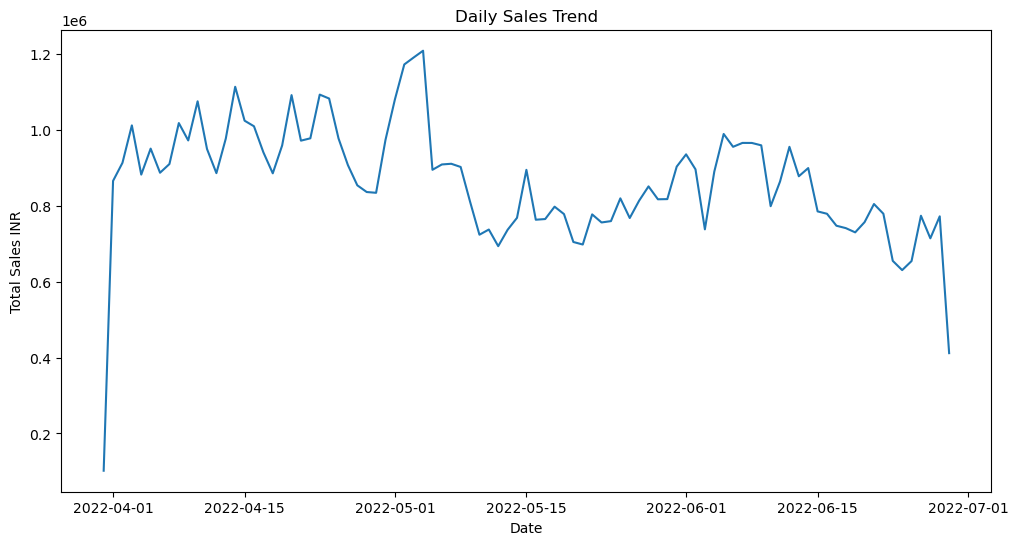

In [21]:
# Plot daily sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Date', y='Amount')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales INR')
plt.show()

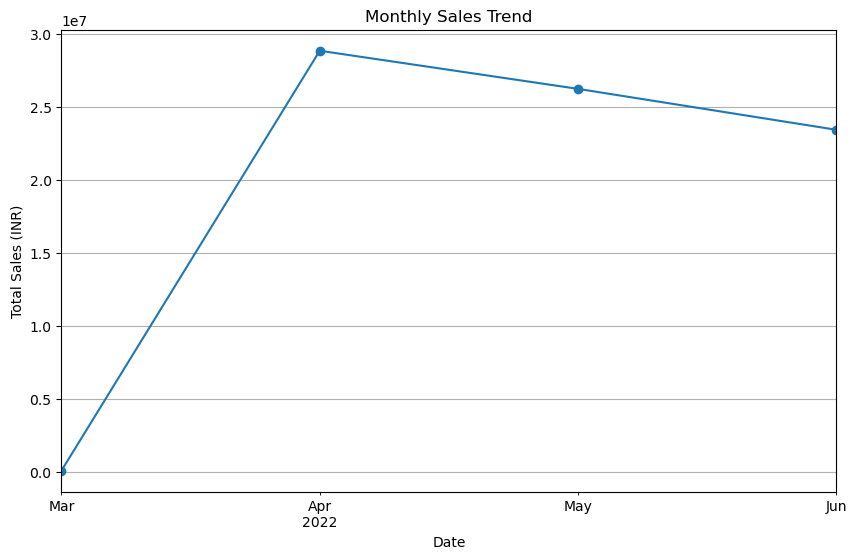

In [22]:
# Monthly Sales Trend
monthly_sales = df.resample('M', on='Date').sum()['Amount']
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()


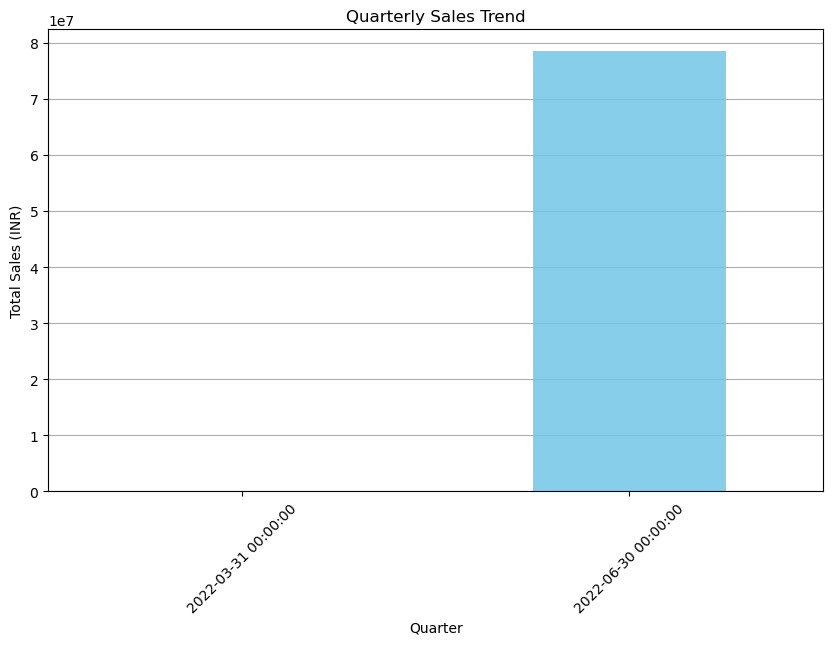

In [23]:
# Quarterly Sales Trend
quarterly_sales = df.resample('Q', on='Date').sum()['Amount']
plt.figure(figsize=(10, 6))
quarterly_sales.plot(kind='bar', color='skyblue')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (INR)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [24]:
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()

In [25]:
#Calculate the percentage change month over month
monthly_growth_rate = sales_over_time.pct_change()

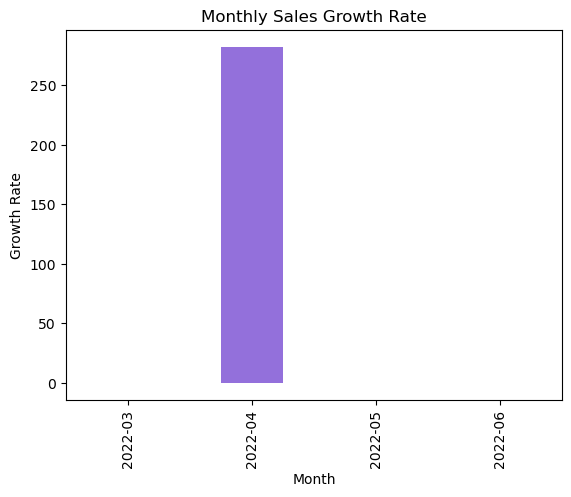

In [26]:

# Assuming monthly_growth_rate is already defined

# Define colors
colors = ['#9370DB']

monthly_growth_rate.plot(kind='bar', title='Monthly Sales Growth Rate', color=colors)
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.show()


# Product Analysis

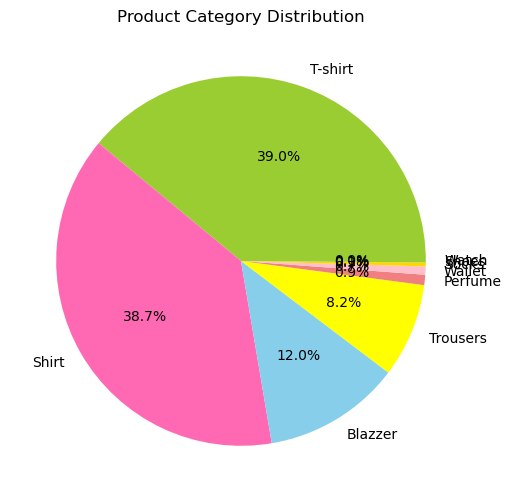

In [27]:
# Product Category Distribution
product_category_distribution = df['Category'].value_counts()

# Define colors
colors = ['yellowgreen', 'hotpink', 'skyblue', 'yellow', 'lightcoral', 'pink','gold']

plt.figure(figsize=(10, 6))
product_category_distribution.plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()


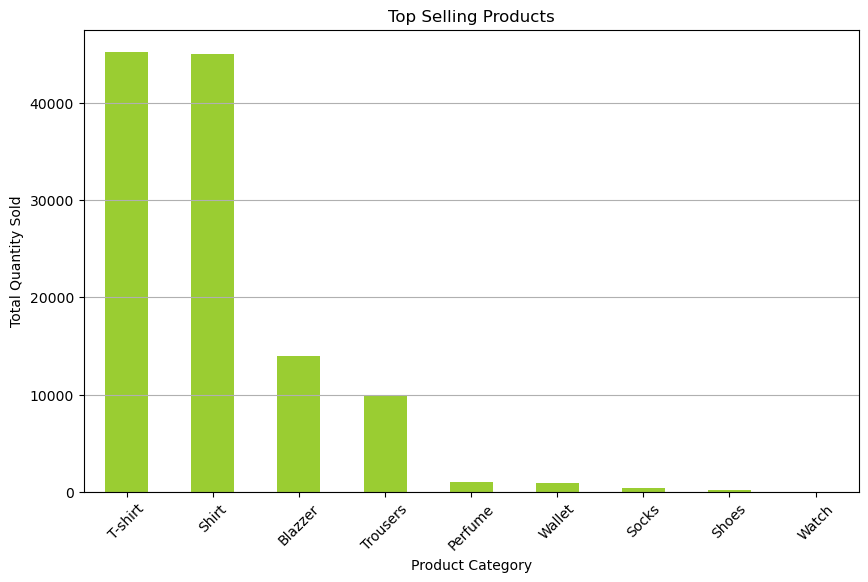

In [28]:
# Top-Selling Products
top_selling_products = df.groupby('Category')['Qty'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='bar', color='yellowgreen')
plt.title('Top Selling Products')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

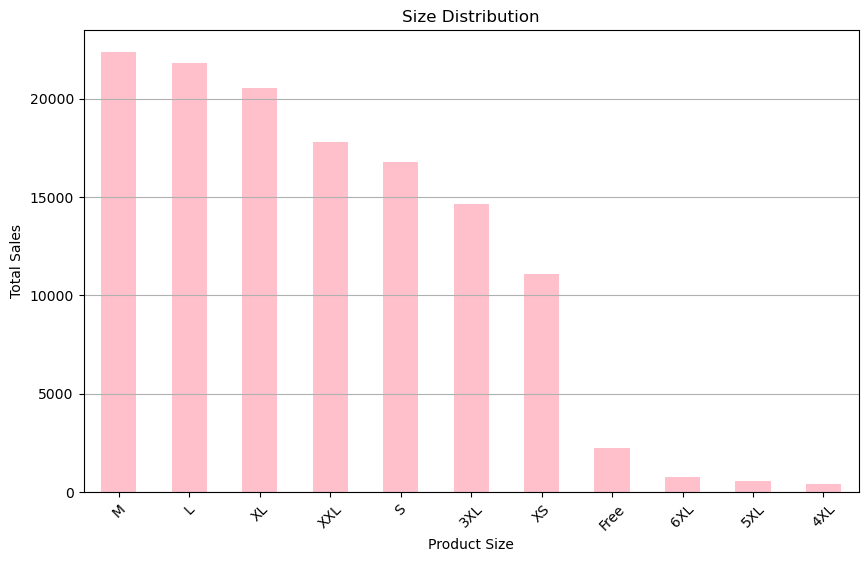

In [29]:
# Size Distribution
size_distribution = df['Size'].value_counts()
plt.figure(figsize=(10, 6))
size_distribution.plot(kind='bar', color='pink')
plt.title('Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

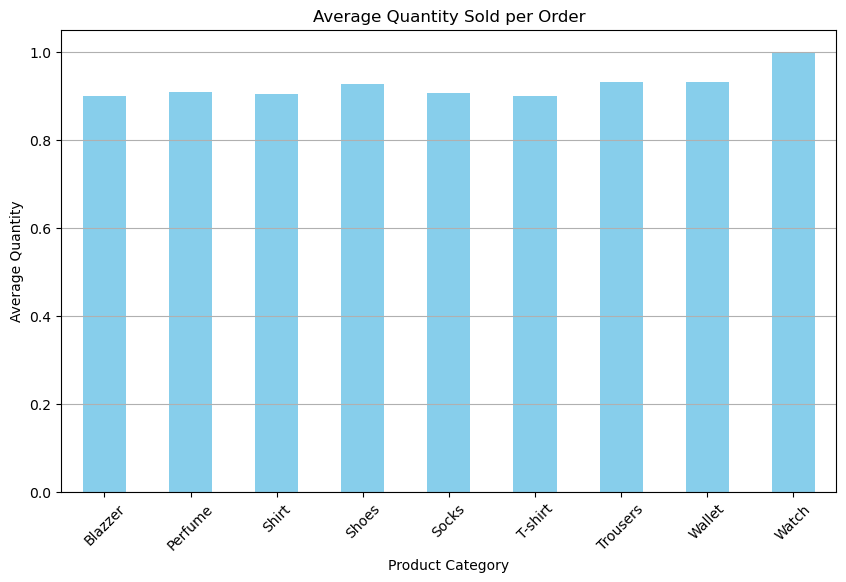

In [30]:
#Quantity Analysis
average_quantity_per_order = df.groupby('Category')['Qty'].mean()
plt.figure(figsize=(10, 6))
average_quantity_per_order.plot(kind='bar', color='skyblue')
plt.title('Average Quantity Sold per Order')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Fulfillment Analysis

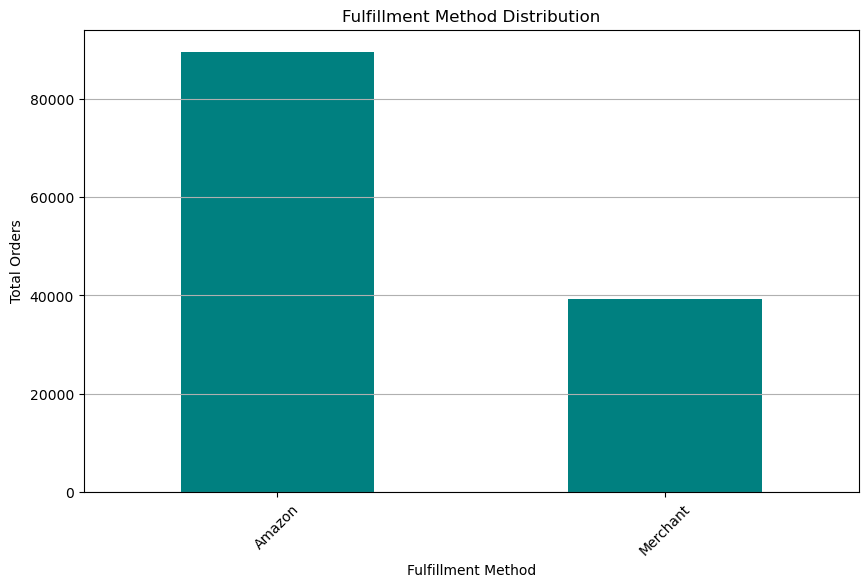

In [31]:
# Fulfillment Method Distribution
fulfillment_method_distribution = df['Fulfilment'].value_counts()
plt.figure(figsize=(10, 6))
fulfillment_method_distribution.plot(kind='bar', color='teal')
plt.title('Fulfillment Method Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Orders')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

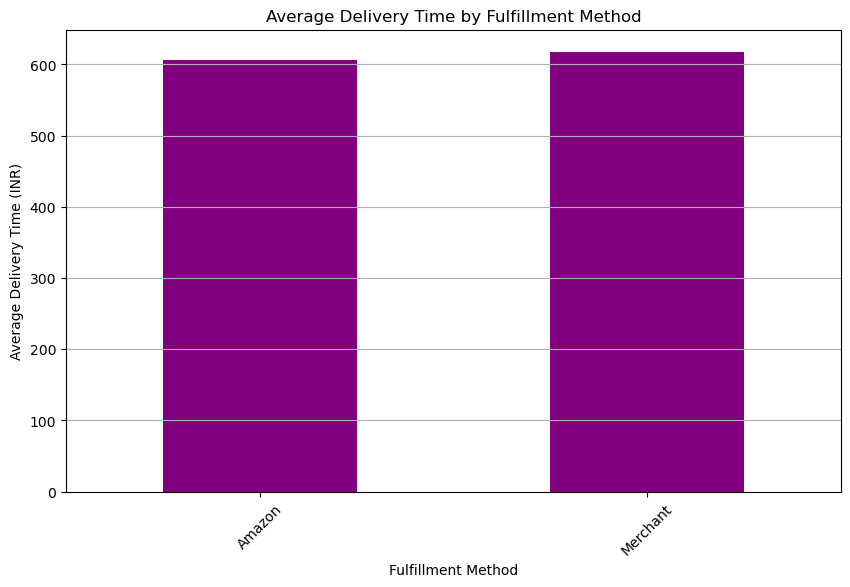

In [32]:
# Delivery Times
delivery_times = df.groupby('Fulfilment')['Amount'].mean()
plt.figure(figsize=(10, 6))
delivery_times.plot(kind='bar',color='purple')
plt.title('Average Delivery Time by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Average Delivery Time (INR)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

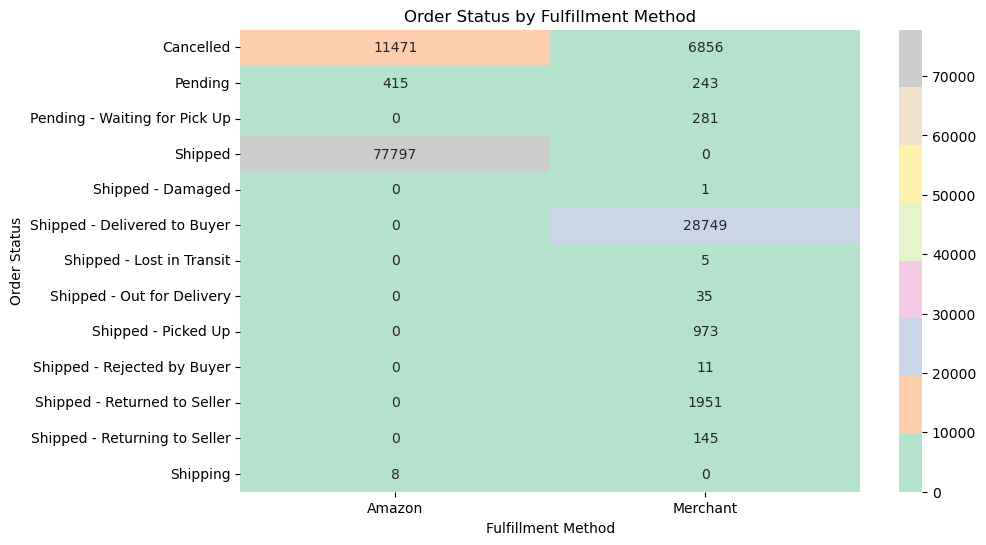

In [33]:
# Order Status by Fulfillment Method
order_status_by_fulfillment = pd.crosstab(df['Status'], df['Fulfilment'])
plt.figure(figsize=(10, 6))
sns.heatmap(order_status_by_fulfillment, cmap='Pastel2', annot=True, fmt='d')
plt.title('Order Status by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Order Status')
plt.show()

# Customer Segmentation

# Segment Customers based on Location and Buying Behavior

In [34]:
# Group by ship-city and calculate total amount spent
city_sales = df.groupby('ship-city')['Amount'].sum().reset_index()


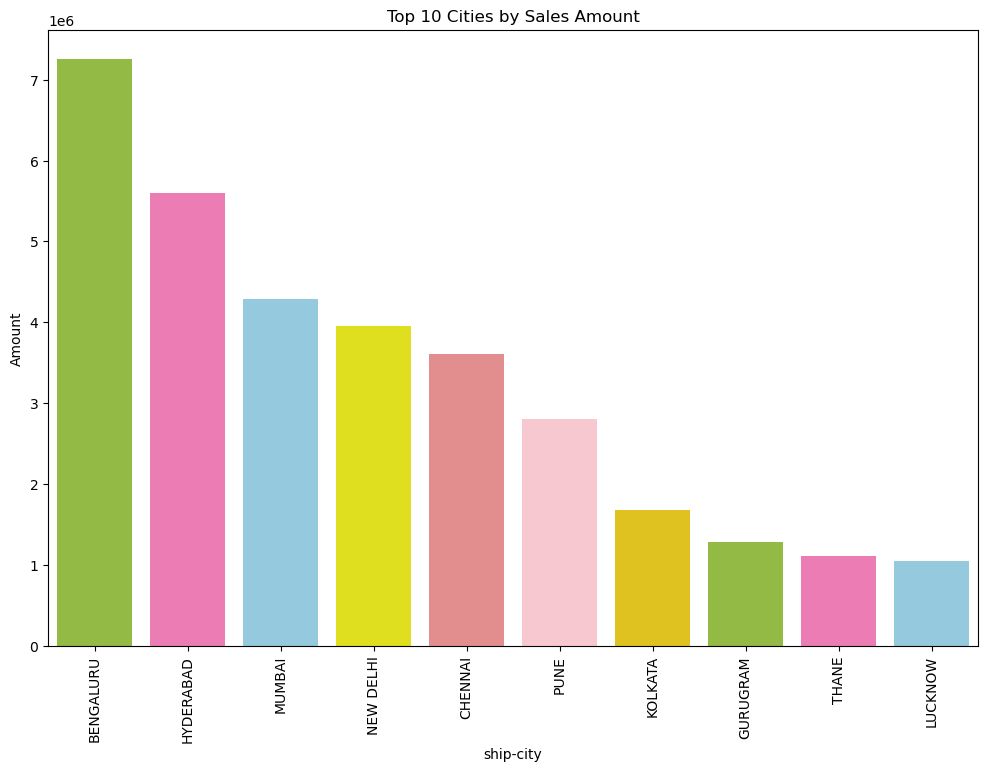

In [35]:
# Top 10 cities by sales amount
top_cities = city_sales.sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='ship-city', y='Amount',palette=colors)
plt.title('Top 10 Cities by Sales Amount')
plt.xticks(rotation=90)
plt.show()

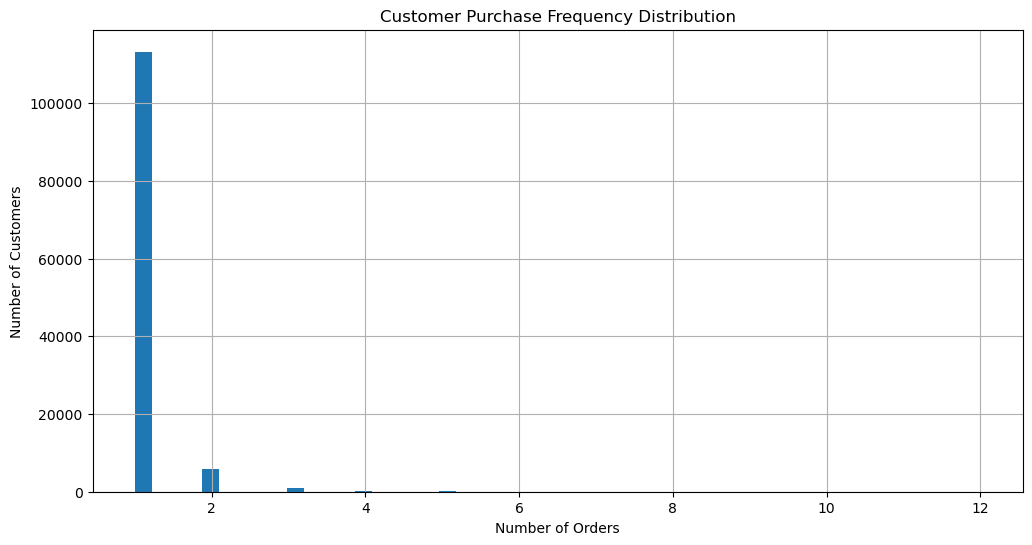

In [36]:
# Calculate the number of orders per customer
purchase_frequency = df.groupby('Order ID').size()

# Plot the purchase frequency distribution
plt.figure(figsize=(12, 6))
purchase_frequency.plot(kind='hist', bins=50, title='Customer Purchase Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [38]:
# Count the number of orders by shipping state
sales_by_state = df['ship-state'].value_counts()




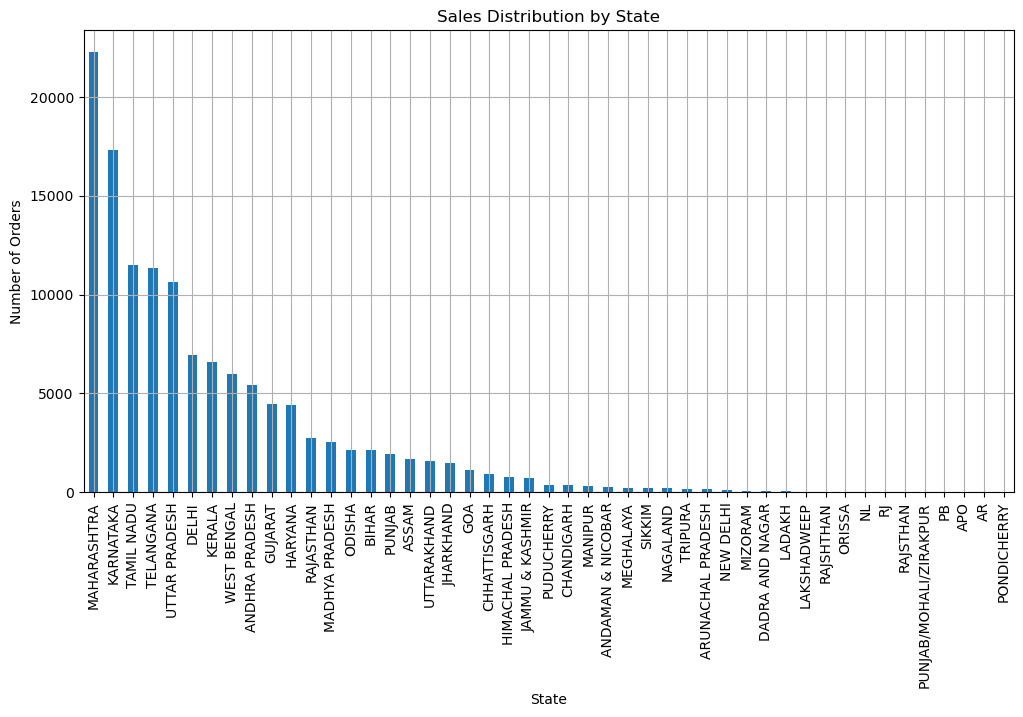

In [39]:
# Plot the distribution of sales by state
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', title='Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

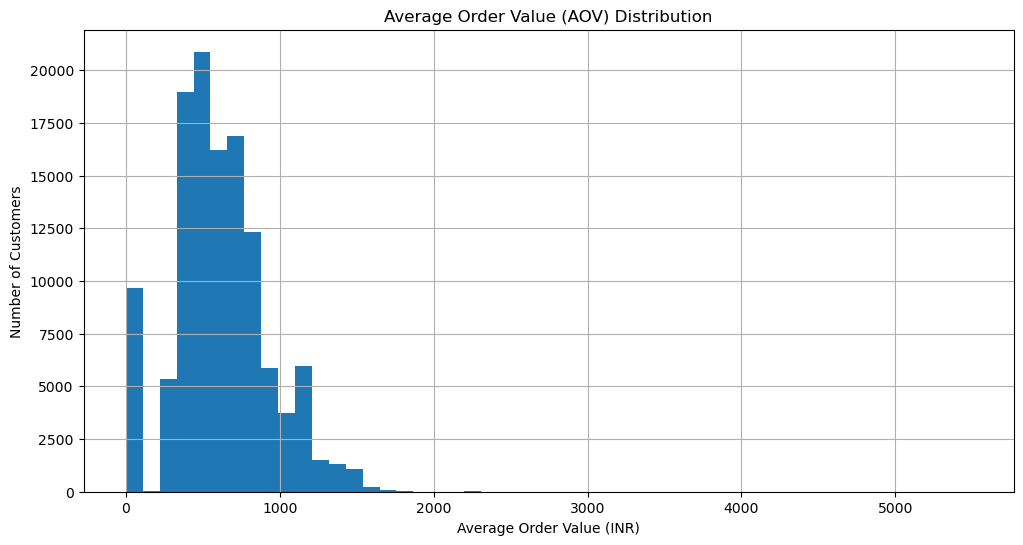

In [40]:
# Calculate the average order value for each customer
aov = df.groupby('Order ID')['Amount'].mean()

# Plot the average order value distribution
plt.figure(figsize=(12, 6))
aov.plot(kind='hist', bins=50, title='Average Order Value (AOV) Distribution')
plt.xlabel('Average Order Value (INR)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


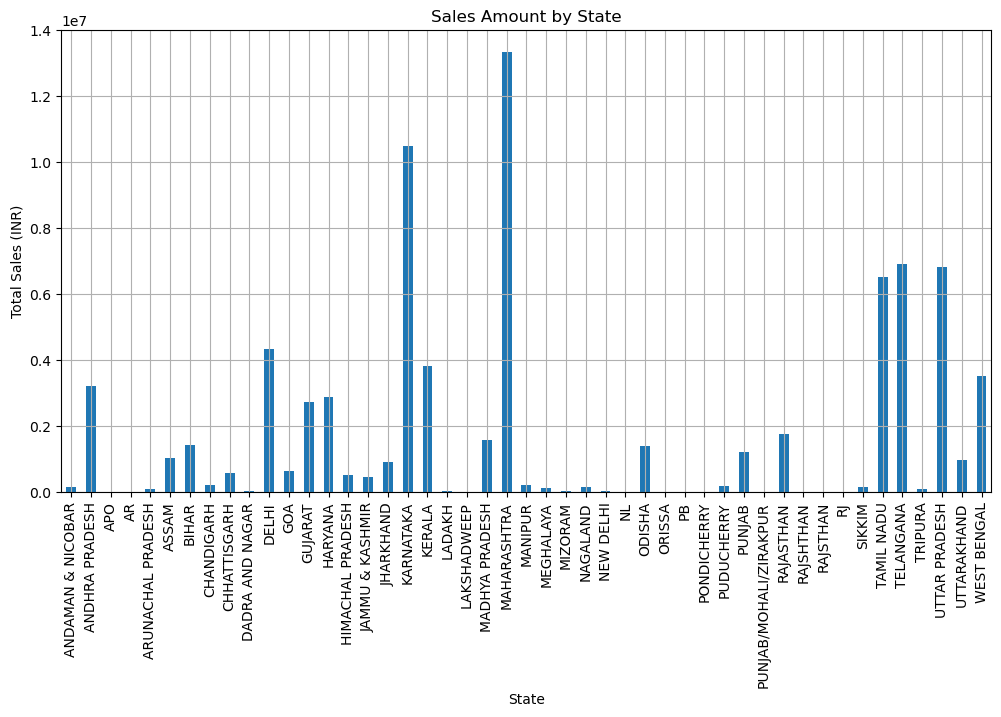

In [41]:
#Sales by State
# Sum the sales amount by state
sales_amount_by_state = df.groupby('ship-state')['Amount'].sum()

# Plot the sales amount by state
plt.figure(figsize=(12, 6))
sales_amount_by_state.plot(kind='bar', title='Sales Amount by State')
plt.xlabel('State')
plt.ylabel('Total Sales (INR)')
plt.grid(True)
plt.show()


<div style="font-family: 'CASTELLAR'; font-size: 20px; color: #9370DB; text-align: rightside;">
 **Summary and Conclusion**
</div>

In diving into the Amazon Sales Report, we embarked on a journey to unravel patterns, preferences, and opportunities within the dataset. From the initial data overview to the meticulous cleaning process, every step was aimed at extracting meaningful insights to guide business decisions.

As we traversed through the data, several key findings emerged:

1. **Sales Trends**: We observed consistent growth in sales over time, punctuated by periodic fluctuations. Monthly growth rates provided insights into seasonal demand patterns, allowing for better anticipation and planning.

2. **Product Insights**: Certain product categories and specific items stood out as customer favorites. Understanding these preferences can inform inventory management and marketing strategies.

3. **Fulfillment Efficiency**: Analyzing fulfillment methods and delivery times shed light on operational efficiencies and areas for improvement. Streamlining these processes can lead to enhanced customer satisfaction.

4. **Customer Segmentation**: Geographical segmentation revealed regional variations in purchasing behavior, highlighting opportunities for targeted marketing efforts and tailored customer experiences.

Looking ahead, the recommendations derived from our analysis offer actionable pathways for the business to thrive:

- By leveraging insights from product analysis, the business can optimize its offerings and promotional campaigns to cater to customer preferences effectively.

- Improvements in inventory management, driven by data on top-selling products and size distribution, can lead to reduced stockouts and enhanced operational efficiency.

- Enhancing fulfillment processes and implementing personalized marketing initiatives can bolster customer satisfaction and loyalty, fostering long-term relationships.
